In [28]:
import urllib.request
import librosa
from IPython import display
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.fft import fft, fftfreq
file_name = "2776.mp3"  # Source: https://bigsoundbank.com/detail-2776-cockatiel-parakeet-8.html
url = f"https://bigsoundbank.com/UPLOAD/mp3/2776.mp3"

urllib.request.urlretrieve(url, file_name)
sound_data, samplerate = librosa.load(file_name)  # sr=None keeps the original sample rate
print(samplerate)

display.display(display.Audio(data=sound_data, rate=samplerate))

22050


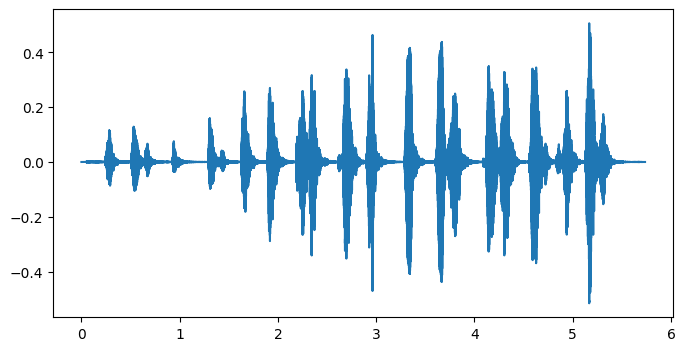

In [29]:
time=np.linspace(0,len(sound_data)/samplerate,num=len(sound_data))
plt.figure(figsize=(8,4))
plt.plot(time,sound_data)

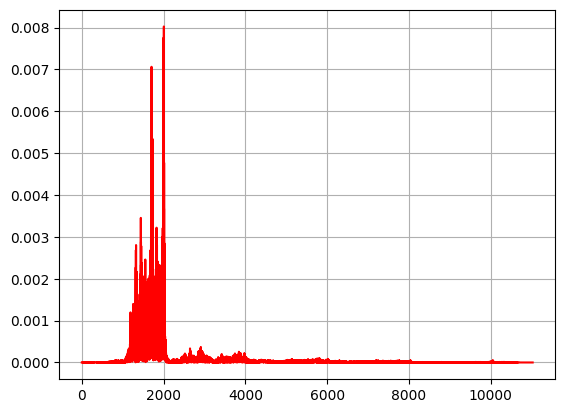

In [51]:

# Sample lens
N = len(sound_data)

# FFT calculate
yf = rfft(sound_data)
real_part = np.real(yf)
imag_part = np.imag(yf)
N_plot = 200
amp_yf=2.0/N * np.abs(yf[0:N//2])
# Calculate the corresponding frequency axis
xf = rfftfreq(N,1/samplerate)[:N//2]
plt.plot(xf, amp_yf,label='bird sound',color='r')


plt.grid(True)
plt.show()

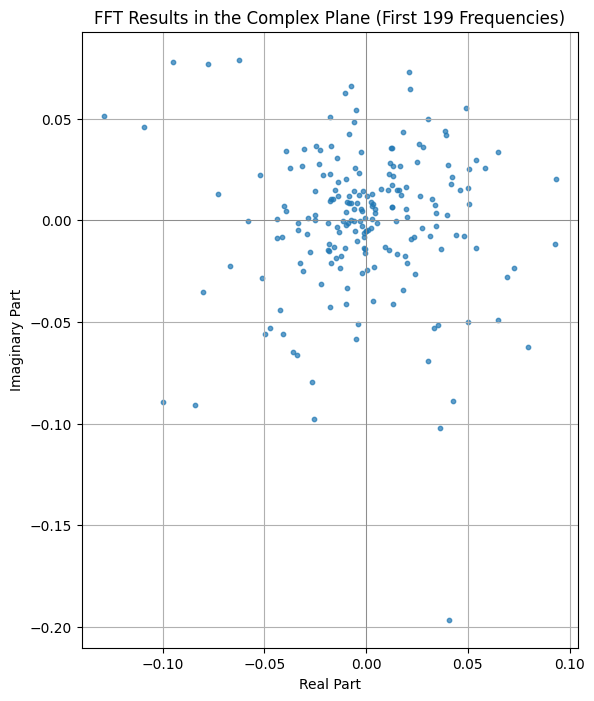

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(real_part[1:N_plot], imag_part[1:N_plot], s=10, alpha=0.7) # 避开DC分量和过多的点
plt.title(f"FFT Results in the Complex Plane (First {N_plot-1} Frequencies)")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.axhline(0, color='gray', linewidth=0.5) # 绘制实轴
plt.axvline(0, color='gray', linewidth=0.5) # 绘制虚轴
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # 保持轴比例相等，使圆看起来是圆的
plt.show()

In [39]:
file_name2 = "2802.mp3"  # Source: https://bigsoundbank.com/detail-2776-cockatiel-parakeet-8.html
url2 = f"https://bigsoundbank.com/UPLOAD/mp3/2802.mp3"

urllib.request.urlretrieve(url2, file_name2)
sound_data2, samplerate2 = librosa.load(file_name2)  # sr=None keeps the original sample rate
print(samplerate2)

display.display(display.Audio(data=sound_data2, rate=samplerate2))

22050


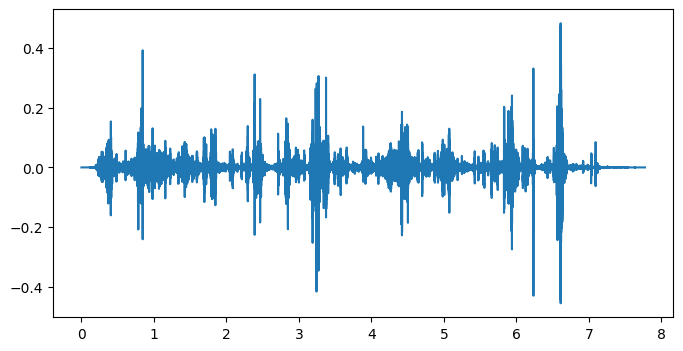

In [40]:
time2=np.linspace(0,len(sound_data2)/samplerate2,num=len(sound_data2))
plt.figure(figsize=(8,4))
plt.plot(time2,sound_data2)

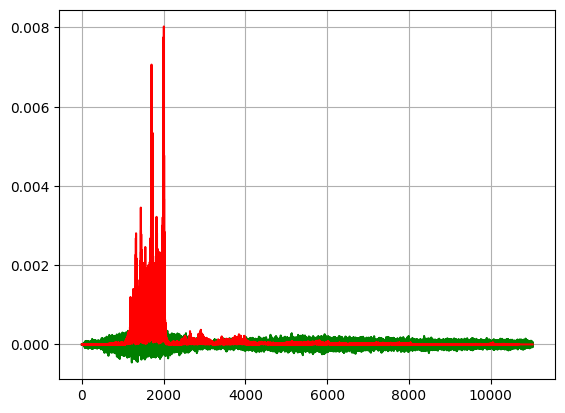

In [48]:


# Sample lens
N2 = len(sound_data2)

# Perform real-valued FFT (only calculate the non-negative frequency part)
yf2 = rfft(sound_data2)
amp_yf2=2.0/N2 * yf2[0:N//2]
# Calculate the corresponding frequency axis (unit: Hz)
xf2 = rfftfreq(N,1/samplerate2)[:N//2]
plt.plot(xf2, amp_yf2,label='book sound',color='g')
plt.plot(xf, amp_yf,label='bird sound',color='r')
plt.grid(True)
plt.show()